In [1]:
import cliff as cliff
import numpy as np
import Q_learning as QL
import pandas as pd
import matplotlib.pyplot as plt
import Sarsa as Sarsa

In [2]:
# setting up env and agent
#define environment
env = cliff.CliffWalkingEnv()
env_state = [x for x in range(0,env.nS)]
env_action = [x for x in range(0,env.nA)]
action = ['up','right','down','left']
epsilon = 0.03

#learning_rate of the Agent, the ability of adopting new knowledge
learning_rate = 0.9
# discount fcotor for Q function between 1~0 the higher more far sighting
discount_factor = 0.99
#initial Q reward value 
initial_reward = 0
#initiate Agent and assigned to object
Agent = QL.Qlearning(env_state,env_action,initial_reward,learning_rate,discount_factor,epsilon)

#reset envirnoment before starts , display environment
#reset() reset env and return state in int
print(env.reset())
#display the game env
env.render()


36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [3]:
#try to move agent and display results
# step return state , reward , game status , transition prob
print(env.step(2))
env.render()

(36, -1, 'continue', {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [4]:
# # example code
# print(env.reset())
# env.render()
# print(env.step(0))
# a = env.render()
# env.shape
# np.unravel_index(a, (4,12))
# possible_states,
#                  possible_actions,
#                  initial_reward,
#                  learning_rate,
#                  discount_factor):
# Agent._qmatrix.iloc[1,:]

In [5]:
# Agent vs Env Set up Q learning 
# epsilon probability of taking random move by agent
# epsilon = 0.01
# # how many win/lose will the agent try on the game
# episode = 500

def Q_episodic_control(episode):
    cum_reward = []
    q_value = []
    #loop for episode
    
    for i in range(0, episode):
        Done = 0
        step_reward = 0
        discount_reward_factor = 0.97
        while True: 
    #       retrive state
            s_t = env.s
    #       epsilon greedy policy with decay, when epsilon greedy policy is used change the code to following
    #       Next_action = Agent.epsilon_greedy_action(s_t,Agent.epsilon)
            Next_action = Agent.epsilon_greedy_action(s_t,Agent.epsilon*discount_reward_factor)
    #       Take action
            
            (s_t1, rewards,game_finish,_) = env.step(Next_action)
#             decay in cumulative reward
            step_reward = step_reward + rewards * discount_reward_factor
#             epsilon decay factor
            discount_reward_factor = discount_reward_factor* discount_factor 
    #         print(s_t1, rewards,game_finish,action[Next_action])
    #         env.render()
#             print(game_finish)




    #       update Q matrix
            Agent.update_model(s_t, Next_action, rewards,s_t1)  
    #       reset game and start next episode when win game    
            if game_finish == 'won':
    #           print("won")
                cum_reward.append(step_reward)
                q_value.append(Agent._qmatrix.sum().sum())
#                 print("end")
                env.reset()
                break
    return cum_reward , q_value     
                                 

In [6]:
cum_reward, q_value = Q_episodic_control(500)

In [7]:
# display Q matrix
Agent._qmatrix

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-10.363344,-10.281118,-9.466315,-8.644112,-7.814442,-6.977237,-6.132429,-5.279948,-4.419726,-3.551691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-10.234101,-9.846476,-9.038761,-8.325143,-7.596179,32.401732,70.611048,85.637602,89.945847,-3.560530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-10.662645,-9.692443,-9.034249,33.364691,-7.777067,-6.905098,-6.040241,-5.125394,-4.417987,92.106530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-10.436527,-10.229036,-9.533533,-9.647939,-8.555018,-6.969405,-6.813434,-6.357995,-5.114925,-3.463304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Return the Best action of Q matrix
a = np.empty((48),dtype='<U5')
for i in range(0,48):
    
    a[i] = action[Agent.get_best_action(i)]

pd.DataFrame(a.reshape((4,12)))

,0,1,2,3,4,5,6,7,8,9,10,11
0,right,down,down,down,right,right,right,right,right,down,right,down
1,down,right,down,down,down,right,down,right,down,down,right,down
2,right,right,right,right,right,right,right,right,right,right,right,down
3,up,up,up,up,up,up,up,up,up,up,up,up


In [9]:
# Return the max value of Q matrix
pd.DataFrame(Agent._qmatrix.max(axis=0).round(0).values.reshape((4,12)))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-10.0,-10.0,-9.0,33.0,-8.0,32.0,71.0,86.0,90.0,92.0,61.0,93.0
1,-10.0,79.0,81.0,83.0,75.0,86.0,88.0,90.0,92.0,94.0,96.0,98.0
2,79.0,81.0,83.0,85.0,86.0,88.0,90.0,92.0,94.0,96.0,98.0,100.0
3,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


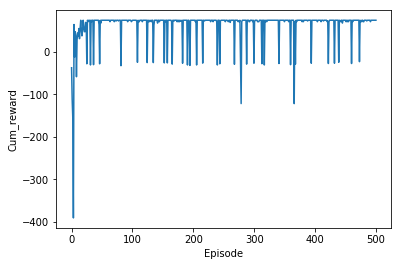

In [10]:
# cumulative reward graph
plt.plot(np.linspace(0,len(cum_reward),len(cum_reward)),cum_reward)
plt.ylabel('Cum_reward')
plt.xlabel('Episode')
plt.show()



cumulative reward function per episode

$R=\sum_{t=0}^n \gamma^t r_{t+1}$

In [11]:
# grid search for Q-learning
epsilons = [0.3,0.2,0.1]
learning_rates = [0.9]
discount_factors = [0.99]
performance = []
for e in epsilons:
    for l in learning_rates:
        for d in discount_factors:
            Agent = QL.Qlearning(env_state,env_action,initial_reward,l,d,e)
            cum_reward,_ = Q_episodic_control(100)
            performance.append([e,l,d,cum_reward])



In [12]:
# Sarsa Agent vs Env Set up
# epsilon probability of taking random move by agent
# epsilon = 0.01
# # how many win/lose will the agent try on the game
# episode = 500

def Sarsa_episodic_control(episode):
    cum_reward = []
    q_value = []
    #loop for episode
    
    for i in range(0, episode):
        Done = 0
        step_reward = 0
        discount_reward_factor = 0.99
        #       retrive state
        s_t = env.s
#       epsilon greedy policy
        action = Agent.epsilon_greedy_action(s_t)
        while True: 

    #       Take action
            (s_t1, rewards,game_finish,_) = env.step(action)
            step_reward = step_reward + rewards * discount_reward_factor
            discount_reward_factor = discount_reward_factor* discount_factor
            
            Next_action = Agent.epsilon_greedy_action(s_t1)
            
            
    #         print(s_t1, rewards,game_finish,action[Next_action])
    #         env.render()
#             print(game_finish)




    #       update Q matrix
            Agent.update_model(s_t, action, rewards,s_t1,Next_action)
            s_t = s_t1
            action = Next_action
    #       reset game and start next episode when win game    
            if game_finish == 'won':
    #           print("won")
                cum_reward.append(step_reward)
                q_value.append(Agent._qmatrix.sum().sum())
#                 print("end")
                env.reset()
                break
    return cum_reward , q_value 
def find_reward(i):
    
    for a,b in enumerate(i):
        if b > 50:
            return a
            break
                                 

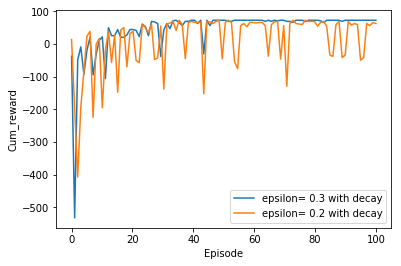

In [19]:
# compare grid search performance in line chart
for i in performance:

    plt.plot(np.linspace(0,len(i[3]),len(i[3])),i[3])
    plt.legend(['epsilon= 0.3 with decay','epsilon= 0.2 with decay','epsilon= 0.1 with decay'])

plt.ylabel('Cum_reward')
plt.xlabel('Episode')
plt.show()


In [18]:
# grid search for Sarsa
epsilons = [0.03,0.2]
learning_rates = [0.2]
discount_factors = [0.99]
performance = []
for e in epsilons:
    for l in learning_rates:
        for d in discount_factors:
            Agent = Sarsa.Sarsa(env_state,env_action,initial_reward,l,d,e)
            cum_reward,_ = Sarsa_episodic_control(100)
            performance.append([e,l,d,cum_reward])